1. Explain how macroeconomic factors influence FX evolution.

2. Calculate the equilibrium foreign exchange using cointegration (use one macroeconomic factor in the analysis).

In [59]:
import pandas as pd
from pandas_datareader import data, wb

import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

%matplotlib inline

In [60]:
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2017, 1, 1)
data = data.DataReader(['FXA','USO'],  'google', start, end)

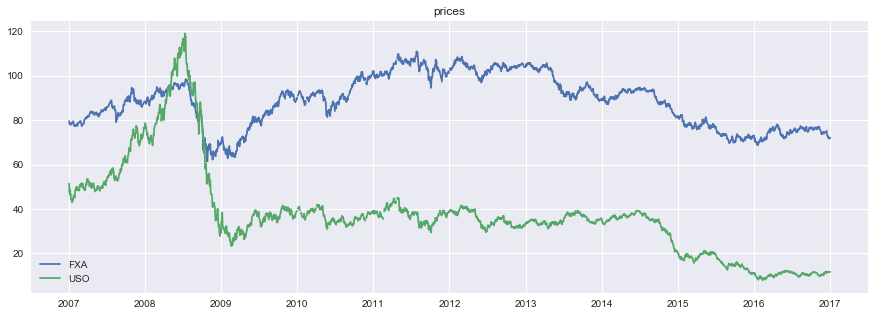

In [61]:
fx_data =data['Open']
plt.figure(figsize=(15,5));
plt.plot(fx_data.index,fx_data);
plt.legend(fx_data.columns.values,loc=3);
plt.title("prices");

3. Calculate the equilibrium foreign exchange using cointegration (use two or more macroeconomic factors in the analysis).

In [62]:
fx_data.head()

,FXA,USO
Date,,
2007-01-03,79.55,51.42
2007-01-04,78.53,48.54
2007-01-05,78.32,47.40
2007-01-08,78.22,48.72
2007-01-09,78.10,46.27


In [63]:
X1 = fx_data['FXA']
X2 = fx_data['USO']

In [64]:
from statsmodels.tsa.stattools import coint

coint(X1, X2)

(0, 0.98590025802596426, array([-3.9007982 , -3.33855958, -3.04613612]))

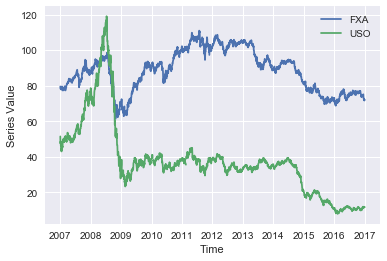

In [65]:
plt.plot(X1)
plt.plot(X2)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([X1.name, X2.name])
plt.show()

In [66]:
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()

# Get rid of the constant column
X1 = X1['FXA']

results.params

const   NaN
FXA     NaN
dtype: float64

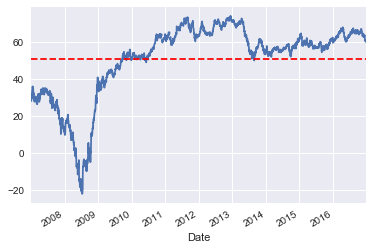

In [67]:
(X1-X2).plot() # Plot the spread
plt.axhline((X1-X2).mean(), color='red', linestyle='--') # Add the mean

Testing for Cointegration
That's an intuitive definition, but how do we test for this statisitcally? There is a convenient test that lives in statsmodels.tsa.stattools. We should see a very low p-value, as we've artifically created two series that are as cointegrated as physically possible.

In [68]:
# compute the p-value of the cointegration test
# will inform us as to whether the spread btwn the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(X1,X2)
print pvalue

0.985900258026


In [69]:
X1.corr(X2)

0.31434791766284448

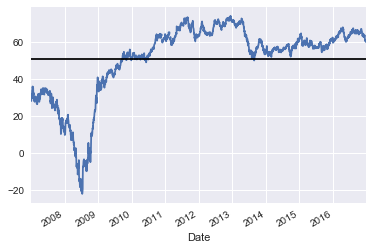

In [70]:
diff_series = X1 - X2
diff_series.plot()
plt.axhline(diff_series.mean(), color='black')

In [71]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

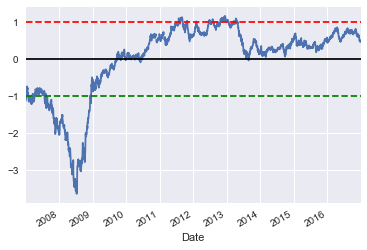

In [72]:
zscore(diff_series).plot()
plt.axhline(zscore(diff_series).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')

In [73]:
import statsmodels.tsa.stattools as ts 
result=ts.coint(X1, X2) 
coin_result = ts.coint(X1, X2) 
print(coin_result)

(0, 0.98590025802596426, array([-3.9007982 , -3.33855958, -3.04613612]))


http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

In [93]:
import pandas as pd
from pandas_datareader import data, wb

start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [94]:
x = data.DataReader(['FXA','USO','EWA'],  'google', start, end)
y = data.DataReader('EWA',  'google', start, end)

In [96]:
fx_data =x['Open']
fx_data2 =y['Open']

In [102]:
fx_data.tail()

,EWA,FXA,USO
Date,,,
2016-12-23,20.01,71.73,11.45
2016-12-27,20.14,71.88,11.64
2016-12-28,20.29,71.70,11.78
2016-12-29,20.40,71.90,11.75
2016-12-30,20.31,72.17,11.66


In [103]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = fx_data[['FXA','USO']]
y = fx_data['EWA']

X[['FXA','USO']] = scale.fit_transform(X[['FXA','USO']].as_matrix())

print (X)

est = sm.OLS(y, X).fit()

est.summary()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y.groupby(df.Doors).mean()